### TABLE OF CONTENTS


Introduction
Logistic regression assumptions
Import Data and python packages

Data exploration
1. Missing value
2. Outiers
3. Visualizations
Data preprocessing
1. Create dummy variables for categorical variables

Correlation matrix
Feature selection
Implementing the module
Data split
Model fitting
Model validation
    1. Accuracy
    2. Confusion matrix
    3. Cross validation
    4. Compute precision, recall, F-measure and support
    5. ROC
Classifier visualization playground

### INTRODUCTION

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

### LOGISTIC REGRESSION ASSUMPTIONS

1. Binary logistic regression requires the dependent variable to be binary.
2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
3. Only the meaningful variables should be included.
4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
5. The independent variables are linearly related to the log odds.
6. Logistic regression requires quite large sample sizes.

### IMPORT DATA AND PYTHON PACKAGES

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font",size=14)
sns.set(style = "white")
sns.set(style = "whitegrid",color_codes = True)


from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
### WIP

Explore the usage sns vs matplotlib
see how to draw a histogram in matplotlib as well
look for the options in sns.set 

##### Read the dataset and print the basic informations

In [69]:
data = pd.read_csv(r'C:\Users\athiq.ahmed\Desktop\Other\Python code\Datasets\banking.csv',header= 0)
data = data.dropna()
print("The number of ovservations and columns- ",data.shape)
print("\nThe list of columns in the dataset- ",list(data.columns))

The number of ovservations and columns-  (41188, 21)

The list of columns in the dataset-  ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [162]:
data.iloc[1-5:,:14]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,112,4,999,0


In [163]:
data.iloc[1-5:,14:]

,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41184,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [ ]:
print(data.dtypes)

In [5]:
categorical = data.dtypes[data.dtypes == "object"]
Numerical = data.dtypes[data.dtypes != "object"]

print("The count of Categorical variables are - ", categorical.count())
print("The count of Numerical variables are - ", Numerical.count())

The count of Categorical variables are -  10
The count of Numerical variables are -  11


In [ ]:
### WIP

### print the variable which are object dyptes
### print the variable which are non-object dyptes
### Define a function to get the unique values of each object/categorical variables and sort them as well

### DATA EXPLORATION

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

In [4]:
Numerical = data.dtypes[data.dtypes != "object"].index
print(Numerical)

data[Numerical].describe()

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
categorical = data.dtypes[data.dtypes == "object"].index
print(categorical)

data[categorical].describe()

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [6]:
print(categorical)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [7]:
# for column_name in categorical:
#       print(data[column_name].unique())  

for column_name in categorical:
    print(column_name,"-",len(data[column_name].unique()),"-",data[column_name].unique(),"\n")

job - 12 - ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student'] 

marital - 4 - ['married' 'single' 'divorced' 'unknown'] 

education - 8 - ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate'] 

default - 3 - ['unknown' 'no' 'yes'] 

housing - 3 - ['yes' 'no' 'unknown'] 

loan - 3 - ['no' 'yes' 'unknown'] 

contact - 2 - ['cellular' 'telephone'] 

month - 10 - ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec'] 

day_of_week - 5 - ['thu' 'fri' 'tue' 'mon' 'wed'] 

poutcome - 3 - ['nonexistent' 'success' 'failure'] 



In [ ]:
print(data.job.unique())
print(data.marital.unique())
print(data.education.unique())
print(data.default.unique())
print(data.housing.unique())
print(data.loan.unique())
print(data.contact.unique())
print(data.month.unique())
print(data.day_of_week.unique())
print(data.poutcome.unique())

##### VARIABLE DESCRIPTIONS

1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)

##### Predict variable(desired target)

y - has the client subscribed a term deposit(binary: "1" means "Yes", "0" means "No")

In [6]:
data['y'].value_counts()


# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(data['y'])
percentage_labels = round((data['y'].value_counts()/total_len)*100,2)
percentage_labels

0    88.73
1    11.27
Name: y, dtype: float64

In [ ]:
### WIP

# Get the percentage of the value_counts and see if we need some sampling methods to fill '1'

##### Barplot for the dependent varialbes

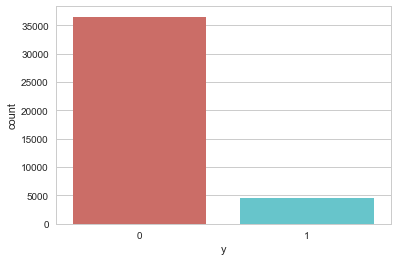

In [166]:
sns.countplot(x='y',data=data,palette = 'hls')
plt.show()

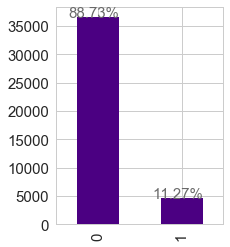

In [568]:
ax = data['y'].value_counts().plot(kind='bar', figsize=(3,4),color="indigo", fontsize=15);
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.1, i.get_height()+.1,str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

In [ ]:
### WIP
# get the same bar using matplotlib along with exact numbers on each bar

##### Let’s get a sense of the numbers across the two classes.

In [167]:
data.groupby('y').mean()


# Observations:

# 1. The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
# 2. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. 
#     The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
# 3 .Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers 
#    who bought the term deposit.

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


##### Check the missing values

In [7]:
# getting an overview of our data
print("Our data has {0} rows and {1} columns".format(data.shape[0], data.shape[1]))
# checking for missing values
print("Are there missing values? {}".format(data.isnull().any().any()))

# It seems there are no missing values

Our data has 41188 rows and 21 columns
Are there missing values? False


In [8]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
y,0,0.0
day_of_week,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0


In [9]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((data['age'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is 0.00%


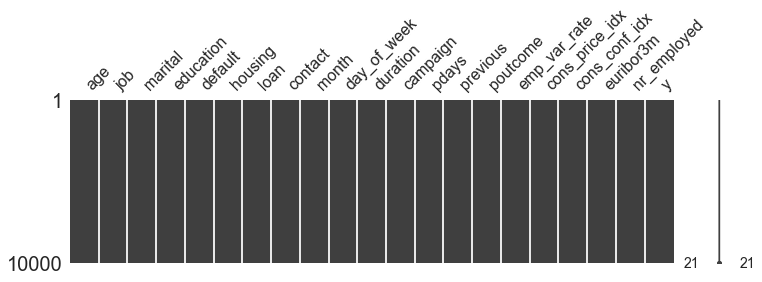

In [10]:
import missingno as msno
%matplotlib inline
msno.matrix(data.sample(10000),figsize=(12,3))
# The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

In [589]:
print("The number of observations and variables are -",data.shape)
data_initial_vars=data.columns.values.tolist();
data_initial_vars

y = 'y'
X= [i for i in data_initial_vars if i not in y ]

print("\nThe number of categorical variables are ",len(categorical))
print("The list of categorical variables are ",categorical)

print("\nThe number of Numerical variables are ",len(Numerical))
print("The list of Numerical variables are ",Numerical)

The number of observations and variables are - (41188, 21)

The number of categorical variables are  10
The list of categorical variables are  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

The number of Numerical variables are  11
The list of Numerical variables are  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


### Outlier detection

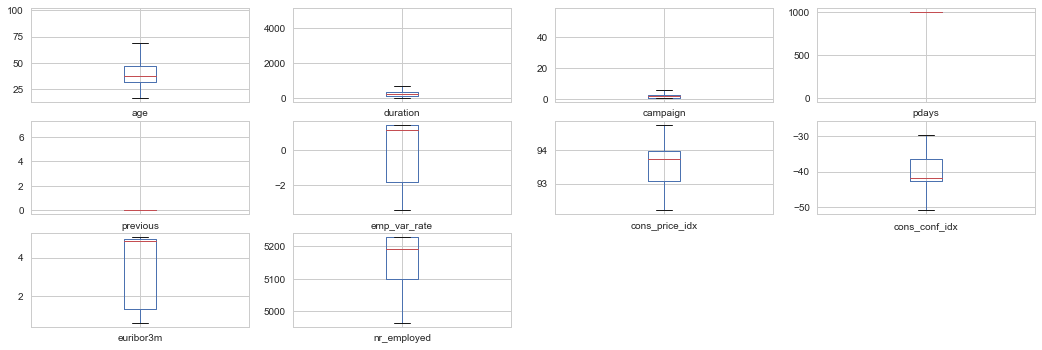

In [578]:
# Outlier detection - Graphically
import matplotlib.pyplot as plt
data[X].plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(18,10))
plt.show()

In [592]:
# Outlier detection - Qunatitativly
# Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
from scipy import stats
import numpy as np

df = data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
# print("\n")
# print(Q1)
# print("\n")
# print(Q3)

print("The outlier percent age for Age is - " + "{:.2f}".format(((df.age < (Q1.age - 1.5 * IQR.age)) | (df.age > (Q3.age + 1.5 * IQR.age))).sum()/(df.age.shape[0])*100))
print("The outlier percent duration for duration is - " + "{:.2f}".format(((df.duration < (Q1.duration - 1.5 * IQR.duration)) | (df.duration > (Q3.duration + 1.5 * IQR.duration))).sum()/(df.duration.shape[0])*100))
print("The outlier percent campaign for campaign is - " + "{:.2f}".format(((df.campaign < (Q1.campaign - 1.5 * IQR.campaign)) | (df.campaign > (Q3.campaign + 1.5 * IQR.campaign))).sum()/(df.campaign.shape[0])*100))
print("The outlier percent pdays for pdays is - " + "{:.2f}".format(((df.pdays < (Q1.pdays - 1.5 * IQR.pdays)) | (df.pdays > (Q3.pdays + 1.5 * IQR.pdays))).sum()/(df.pdays.shape[0])*100))
print("The outlier percent previous for previous is - " + "{:.2f}".format(((df.previous < (Q1.previous - 1.5 * IQR.previous)) | (df.previous > (Q3.previous + 1.5 * IQR.previous))).sum()/(df.previous.shape[0])*100))
print("The outlier percent emp_var_rate for emp_var_rate is - " + "{:.2f}".format(((df.emp_var_rate < (Q1.emp_var_rate - 1.5 * IQR.emp_var_rate)) | (df.emp_var_rate > (Q3.emp_var_rate + 1.5 * IQR.emp_var_rate))).sum()/(df.emp_var_rate.shape[0])*100))
print("The outlier percent cons_price_idx for cons_price_idx is - " + "{:.2f}".format(((df.cons_price_idx < (Q1.cons_price_idx - 1.5 * IQR.cons_price_idx)) | (df.cons_price_idx > (Q3.cons_price_idx + 1.5 * IQR.cons_price_idx))).sum()/(df.cons_price_idx.shape[0])*100))
print("The outlier percent cons_conf_idx for cons_conf_idx is - " + "{:.2f}".format(((df.cons_conf_idx < (Q1.cons_conf_idx - 1.5 * IQR.cons_conf_idx)) | (df.cons_conf_idx > (Q3.cons_conf_idx + 1.5 * IQR.cons_conf_idx))).sum()/(df.cons_conf_idx.shape[0])*100))
print("The outlier percent euribor3m for euribor3m is - " + "{:.2f}".format(((df.euribor3m < (Q1.euribor3m - 1.5 * IQR.euribor3m)) | (df.euribor3m > (Q3.euribor3m + 1.5 * IQR.euribor3m))).sum()/(df.euribor3m.shape[0])*100))
print("The outlier percent nr_employed for nr_employed is - " + "{:.2f}".format(((df.nr_employed < (Q1.nr_employed - 1.5 * IQR.nr_employed)) | (df.nr_employed > (Q3.nr_employed + 1.5 * IQR.nr_employed))).sum()/(df.nr_employed.shape[0])*100))

The outlier percent age for Age is - 1.14
The outlier percent duration for duration is - 7.19
The outlier percent campaign for campaign is - 5.84
The outlier percent pdays for pdays is - 3.68
The outlier percent previous for previous is - 13.66
The outlier percent emp_var_rate for emp_var_rate is - 0.00
The outlier percent cons_price_idx for cons_price_idx is - 0.00
The outlier percent cons_conf_idx for cons_conf_idx is - 1.09
The outlier percent euribor3m for euribor3m is - 0.00
The outlier percent nr_employed for nr_employed is - 0.00


In [ ]:
### WIP

outlier treatment check out later

### Correlation matrix

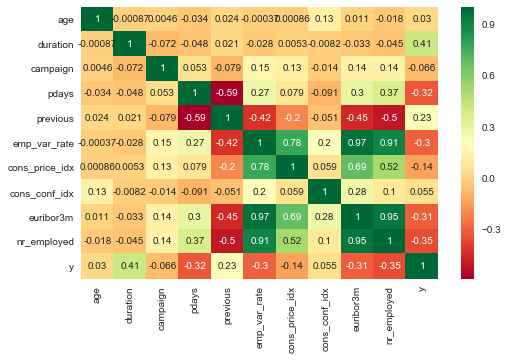

In [68]:
plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.show()

# emp_var_rate is removed

In [ ]:
### WIP

chk out for scatter plot, density plots, histograms and many more

##### Categorical visualization

In [13]:
print("The number of categorical variables are ",len(categorical))
print("\nThe list of categorical variables are ",categorical)

The number of categorical variables are  10

The list of categorical variables are  job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
dtype: object


##### Cross tab between Marital status and purchase of term deposits

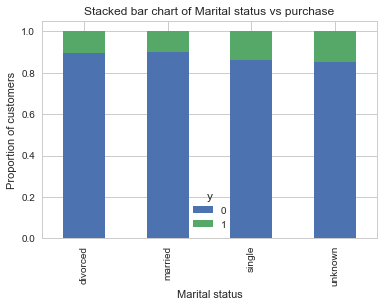

In [172]:
### Using pandas

table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked bar chart of Marital status vs purchase')
plt.xlabel('Marital status')
plt.ylabel('Proportion of customers')
plt.savefig('marital_status_vs_purchase')

# The marital status does not seem a strong predictor for the outcome variable.

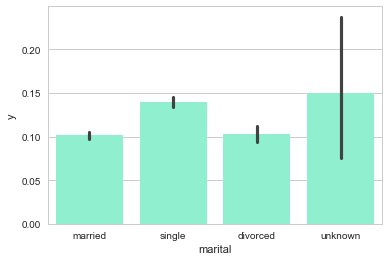

In [447]:
### Using seaborn

sns.barplot(data.marital, data.y, data=data, color="aquamarine")
plt.show()

##### Cross tab between Education and Purchase of term deposits

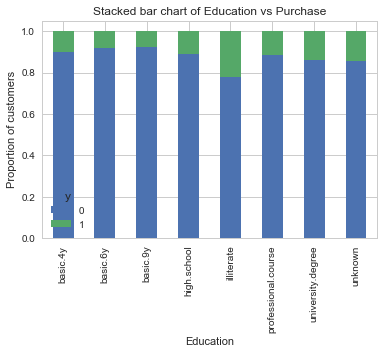

In [225]:
table = pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked bar chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of customers')
plt.savefig('education_vs_purchase')

# Education seems a good predictor of the outcome variable.

In [262]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

##### Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

In [70]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [264]:
data.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

##### Breakdown of crosstab outputs

In [226]:
# table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
table

y,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [227]:
# table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
table.sum(1)

education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
dtype: int64

In [228]:
# table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
table.dtypes

y
0    int64
1    int64
dtype: object

In [229]:
# table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
table.sum(1).astype(float)

education
basic.4y                4176.0
basic.6y                2292.0
basic.9y                6045.0
high.school             9515.0
illiterate                18.0
professional.course     5243.0
university.degree      12168.0
unknown                 1731.0
dtype: float64

##### Cross tab between day of week and Purchase of term deposits

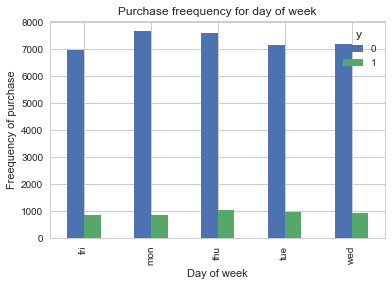

In [199]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase freequency for day of week')
plt.xlabel('Day of week')
plt.ylabel('Freequency of purchase')
plt.savefig('day_of_week_vs_purchase')

# Day of week may not be a good predictor of the outcome.

##### Cross tab between Month and Purchase of term deposits

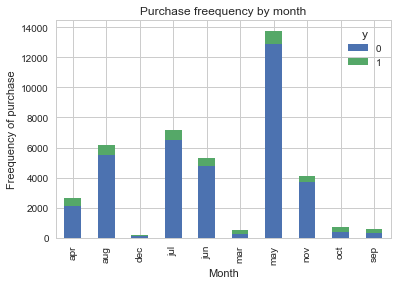

In [205]:
pd.crosstab(data.month,data.y).plot(kind='bar',stacked=True)
plt.title('Purchase freequency by month')
plt.xlabel('Month')
plt.ylabel('Freequency of purchase')
plt.savefig('month_vs_purchase')

# Month might be a good predictor of the outcome variable.

##### Cross tab between Poutcome and Purchase of term deposits

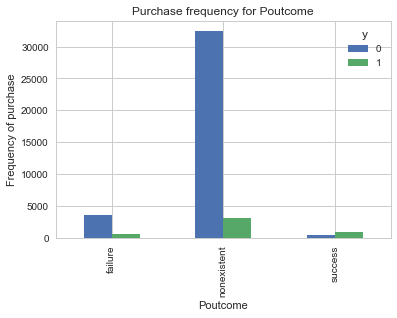

In [209]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of purchase')
plt.savefig('poutcome_vs_purchase')

# Poutcome seems to be a good predictor of the outcome variable.

##### Cross tab between Job and Purchase of term deposit's

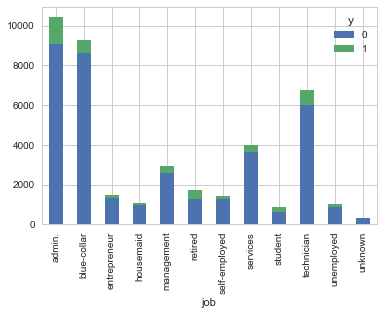

In [232]:
pd.crosstab(data.job,data.y).plot(kind='bar',stacked=True)

# job seems to be a good predictor of the outcome variable.

##### Cross tab between default and Purchase of term deposit's

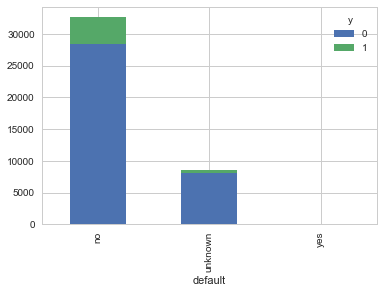

In [605]:
pd.crosstab(data.default,data.y).plot(kind='bar', stacked=True)

# default seems to be a good predictor of the outcome variable.

##### Cross tab between housing and Purchase of term deposit's

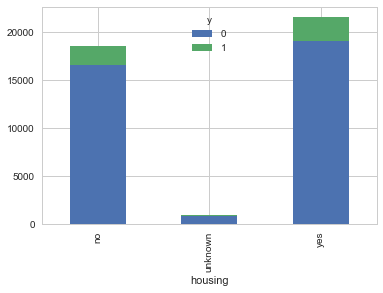

In [606]:
pd.crosstab(data.housing,data.y).plot(kind='bar', stacked=True)

# housing does not seems to be a good predictor of the outcome variable.

##### Cross tab between loan and Purchase of term deposit's

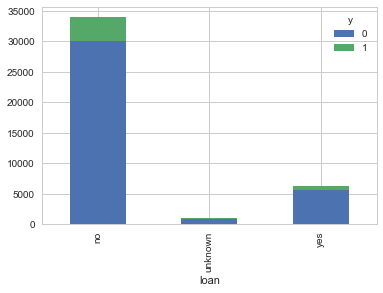

In [607]:
pd.crosstab(data.loan,data.y).plot(kind='bar', stacked=True)

# loan seems to be a good predictor of the outcome variable.

##### Cross tab between contact and Purchase of term deposit's

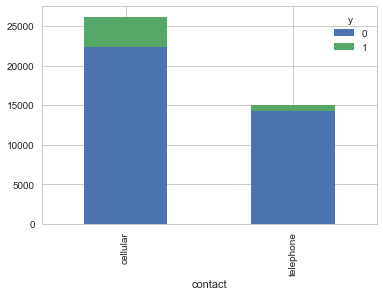

In [608]:
pd.crosstab(data.contact,data.y).plot(kind='bar', stacked=True)

# contact seems to be a good predictor of the outcome variable.

###### Summary of visualization - categorical variables

1. The marital status does not seem a strong predictor for the outcome variable.
2. Education seems a good predictor of the outcome variable.
3. Day of week may not be a good predictor of the outcome.
4. Month might be a good predictor of the outcome variable.
5. Poutcome seems to be a good predictor of the outcome variable.
6. job seems to be a good predictor of the outcome variable.
7. default seems to be a good predictor of the outcome variable.
8. housing does not seems to be a good predictor of the outcome variable.
9. loan seems to be a good predictor of the outcome variable.
10. contact seems to be a good predictor of the outcome variable.	  

##### Include: Education, Month, Poutcome, Job, default, loan, contact

##### Numerical visualization

In [8]:
print("The number of Numerical variables are ",len(Numerical))
print("\nThe list of Numerical variables are ",Numerical)

The number of Numerical variables are  11

The list of Numerical variables are  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


##### Histogram by Age

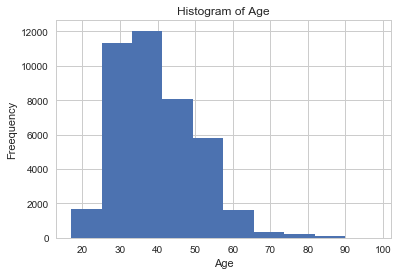

In [14]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Freequency')
plt.savefig('Age_histogram')

# Most of the customers of the bank in this dataset are in the age range of 30–40.

##### Density plot of Age for term deposit subscription

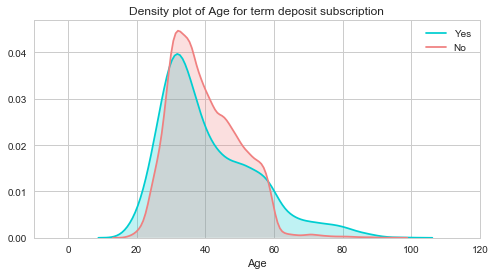

In [62]:
plt.figure(figsize=(8,4))
ax = sns.kdeplot(data["age"][data.y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["age"][data.y == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of Age for term deposit subscription')
ax.set(xlabel='Age')
plt.xlim(-10,120)
plt.show()

# The age distribution for subscribers and not subscribers is actually very similar. 
# One notable difference is that, people above 60 tend to be non subscribers 

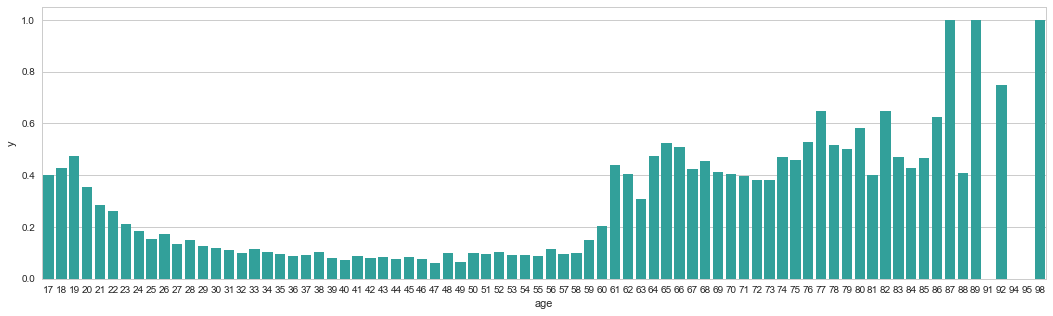

In [16]:
plt.figure(figsize=(18,5))
avg_subscription_byage = data[["age", "y"]].groupby(['age'], as_index=False).mean()
g = sns.barplot(x='age', y='y', data=avg_subscription_byage, color="LightSeaGreen")
plt.show()

# It seems the people with 
age < 24 - probability of subscription between 0.2 to 0.4
age > 60 and 85 - probability of subscription around 0.4 to 0.6
age > 85 - probability of subscription > 0.6

##### Density plot of duration for term deposit subscription

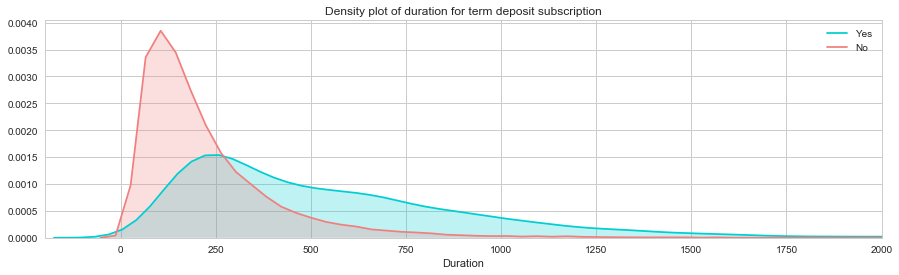

In [59]:
plt.figure(figsize=(15,4))
ax = sns.kdeplot(data["duration"][data.y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["duration"][data.y == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of duration for term deposit subscription')
ax.set(xlabel='Duration')
plt.xlim(-200,2000)
plt.show()

# The duration distribution for subscribers and not subscribers is actually not very similar. 
# One notable difference is that, the less the duration the people are not likely to subscribe term deposits.

##### Density plot of campaign for term deposit subscription

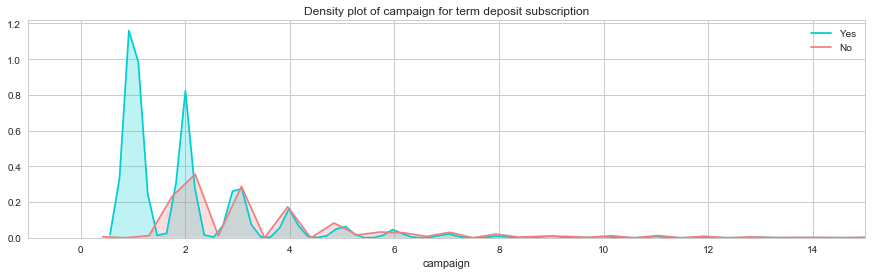

In [18]:
plt.figure(figsize=(15,4))
ax = sns.kdeplot(data["campaign"][data.y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["campaign"][data.y == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of campaign for term deposit subscription')
ax.set(xlabel='campaign')
plt.xlim(-1,15)
plt.show()

# The campaign distribution for subscribers and not subscribers is actually not very similar. 
# One notable difference is that, people who are contacted less times are likely to subscribe term deposits and if the number
#     of contacts increases people tend not to subscribe term deposits

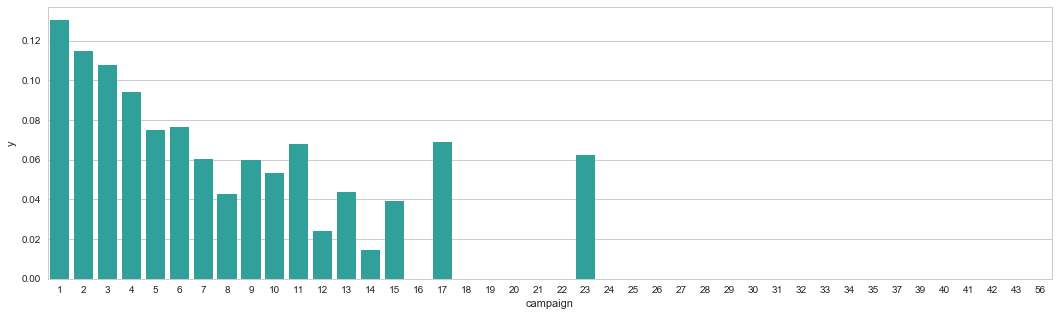

In [11]:
plt.figure(figsize=(18,5))
avg_subscription_bycampaign = data[["campaign", "y"]].groupby(['campaign'], as_index=False).mean()
g = sns.barplot(x='campaign', y='y', data=avg_subscription_byage, color="LightSeaGreen")
plt.show()


# The more number of contacts performed during the campaign the less likely the probability of subscription

##### Density plot of pdays for term deposit subscription

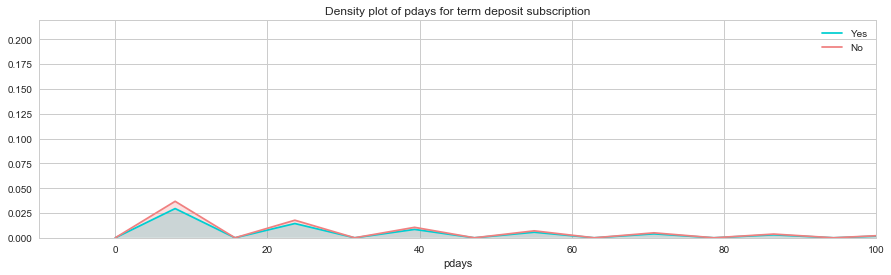

In [13]:
plt.figure(figsize=(15,4))
ax = sns.kdeplot(data["pdays"][data.y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["pdays"][data.y == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of pdays for term deposit subscription')
ax.set(xlabel='pdays')
plt.xlim(-10,100)
plt.show()

# The pdays distribution for subscribers and not subscribers is actually very similar. 

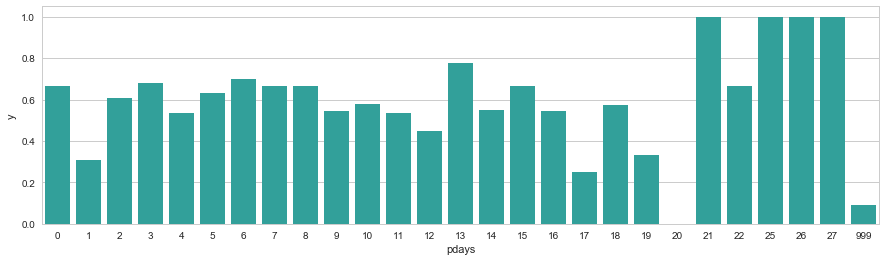

In [25]:
plt.figure(figsize=(15,4))
avg_subscription_bypdays = data[["pdays", "y"]].groupby(['pdays'], as_index=False).mean()
g = sns.barplot(x='pdays', y='y', data=avg_subscription_bypdays, color="LightSeaGreen")
plt.show()

# The average number(2-16) of days passed by after the client was last contacted from a previous campaign 
# is ideal to get the probability of around 0.5 for term deposit subscription

##### Density plot of previous for term deposit subscription

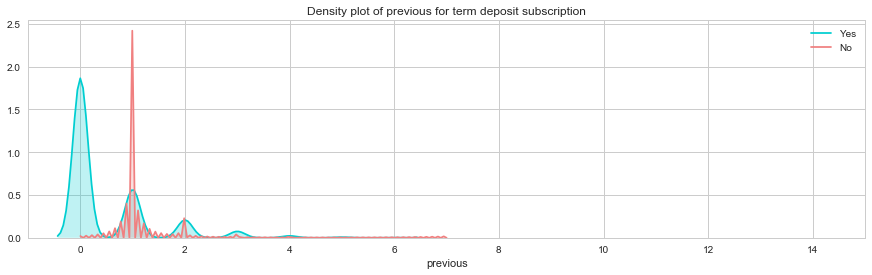

In [22]:
plt.figure(figsize=(15,4))
ax = sns.kdeplot(data["previous"][data.y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["previous"][data.y == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of previous for term deposit subscription')
ax.set(xlabel='previous')
plt.xlim(-1,15)
plt.show()

# The previous distribution for subscribers and not subscribers is actually not very similar. 
# One notable difference is that, people with less number of contacts performed before this campaign
#     tend to subscribe term deposits

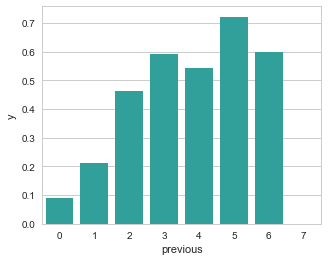

In [30]:
plt.figure(figsize=(5,4))
avg_subscription_byprevious = data[["previous", "y"]].groupby(['previous'], as_index=False).mean()
g = sns.barplot(x='previous', y='y', data=avg_subscription_byprevious, color="LightSeaGreen")
plt.show()

# The number of contacts (3-6) performed before this campaign are likely to get 0.5 probability of term deposit subscription

##### Density plot of emp_var_rate for term deposit subscription

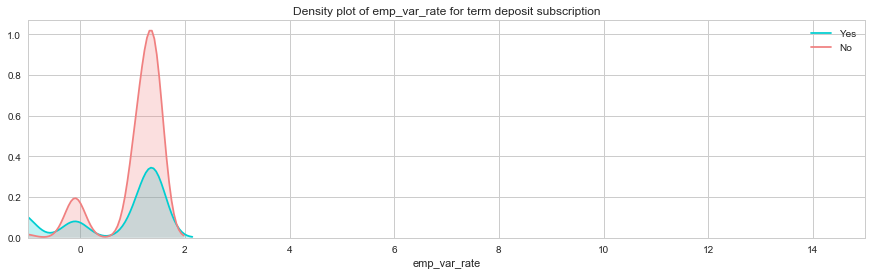

In [23]:
plt.figure(figsize=(15,4))
ax = sns.kdeplot(data["emp_var_rate"][data.y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["emp_var_rate"][data.y == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of emp_var_rate for term deposit subscription')
ax.set(xlabel='emp_var_rate')
plt.xlim(-1,15)
plt.show()

# The emp_var_rate distribution for subscribers and not subscribers is actually very similar. 

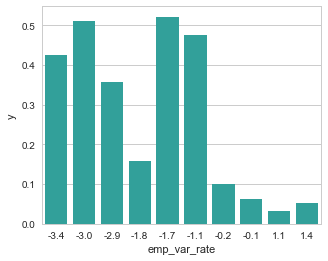

In [31]:
plt.figure(figsize=(5,4))
avg_subscription_byemp_var_rate = data[["emp_var_rate", "y"]].groupby(['emp_var_rate'], as_index=False).mean()
g = sns.barplot(x='emp_var_rate', y='y', data=avg_subscription_byemp_var_rate, color="LightSeaGreen")
plt.show()

# If the employee variable rate is -ve the probability of term deposit subscription is around 0.2 - 0.5 

##### Density plot of cons_price_idx for term deposit subscription

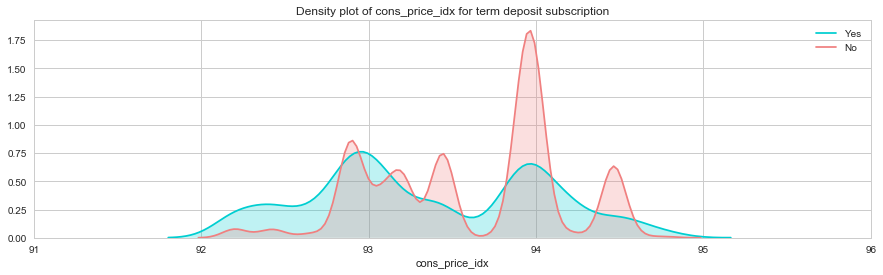

In [30]:
plt.figure(figsize=(15,4))
ax = sns.kdeplot(data["cons_price_idx"][data.y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["cons_price_idx"][data.y == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of cons_price_idx for term deposit subscription')
ax.set(xlabel='cons_price_idx')
plt.xlim(91,96)
plt.show()

# The cons_price_idx distribution for subscribers and not subscribers is actually not very similar. 
# The probability of no subscription increases as the conusmer price index is around 94

##### Density plot of cons_conf_idx for term deposit subscription

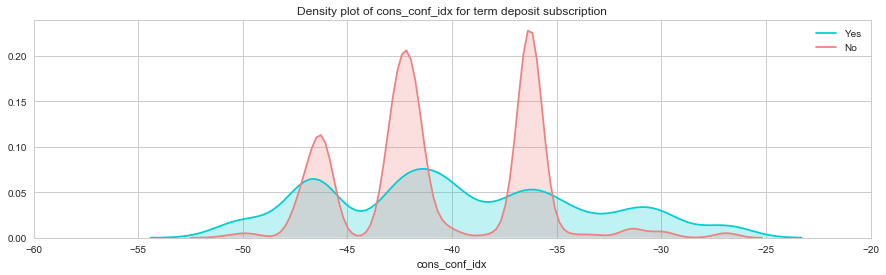

In [35]:
plt.figure(figsize=(15,4))
ax = sns.kdeplot(data["cons_conf_idx"][data.y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["cons_conf_idx"][data.y == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of cons_conf_idx for term deposit subscription')
ax.set(xlabel='cons_conf_idx')
plt.xlim(-60,-20)
plt.show()

# The cons_conf_idx distribution for subscribers and not subscribers is actually not very similar.

##### Density plot of euribor3m for term deposit subscription

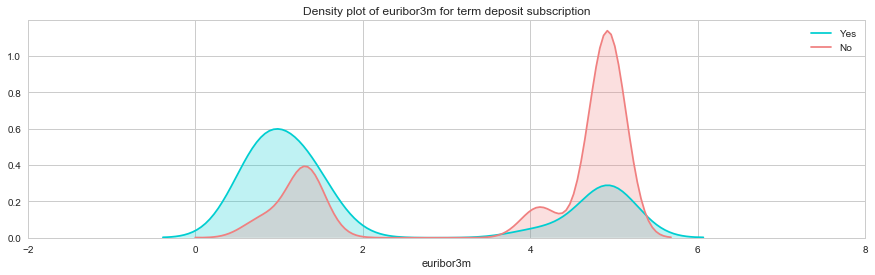

In [40]:
plt.figure(figsize=(15,4))
ax = sns.kdeplot(data["euribor3m"][data.y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["euribor3m"][data.y == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of euribor3m for term deposit subscription')
ax.set(xlabel='euribor3m')
plt.xlim(-2,8)
plt.show()

# The euribor3m distribution for subscribers and not subscribers is actually very similar.

##### Density plot of nr_employed for term deposit subscription

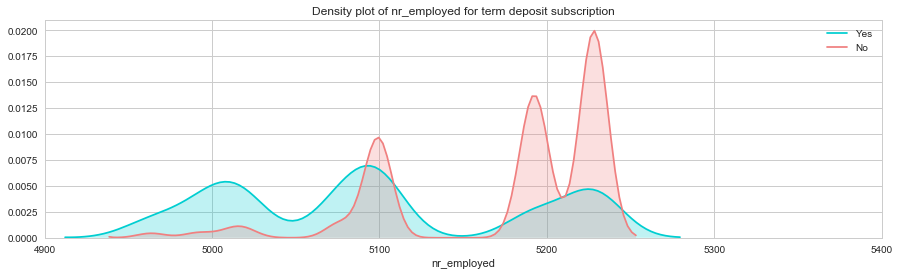

In [45]:
plt.figure(figsize=(15,4))
ax = sns.kdeplot(data["nr_employed"][data.y == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["nr_employed"][data.y == 0], color="lightcoral", shade=True)
plt.legend(['Yes', 'No'])
plt.title('Density plot of nr_employed for term deposit subscription')
ax.set(xlabel='nr_employed')
plt.xlim(4900,5400)
plt.show()

# The nr_employed distribution for subscribers and not subscribers is actually not very similar.

###### Summary of visualization - Numerical variables

Age:
Most of the customers of the bank in this dataset are in the age range of 30–40.
The age distribution for subscribers and not subscribers is actually very similar.
One notable difference is that, people above 60 tend to be non subscribers 
age < 24 - probability of subscription between 0.2 to 0.4
age > 60 and 85 - probability of subscription around 0.4 to 0.6
age > 85 - probability of subscription > 0.6

Duration:
The duration distribution for subscribers and not subscribers is actually not very similar. One notable difference is that, the less the duration the people are not likely to subscribe term deposits.

Campaign:
The campaign distribution for subscribers and not subscribers is actually not very similar. One notable difference is that, people who are contacted less times are likely to subscribe term deposits and if the number of contacts increases people tend not to subscribe term deposits
The more number of contacts performed during the campaign the less likely the probability of subscription

Pdays:
The pdays distribution for subscribers and not subscribers is actually very similar. 
The average number(2-16) of days passed by after the client was last contacted from a previous campaign is ideal to get the probability of around 0.5 for term deposit subscription

previous:
The previous distribution for subscribers and not subscribers is actually not very similar. One notable difference is that, people with less number of contacts performed before this campaign tend to subscribe term deposits
The number of contacts (3-6) performed before this campaign are likely to get 0.5 probability of term deposit subscription

emp_var_rate:
The emp_var_rate distribution for subscribers and not subscribers is actually very similar. 
If the employee variable rate is -ve the probability of term deposit subscription is around 0.2 - 0.5 

cons_price_idx:
The cons_price_idx distribution for subscribers and not subscribers is actually not very similar. The probability of no subscription increases as the conusmer price index is around 94

cons_conf_idx:
The cons_conf_idx distribution for subscribers and not subscribers is actually not very similar.

euribor3m:
The euribor3m distribution for subscribers and not subscribers is actually very similar.

nr_employed:
The nr_employed distribution for subscribers and not subscribers is actually not very similar.


##### Include: Age, Duration, Campaing, pdays, previous,cons_price_idx,cons_conf_idx,nr_employed

##### Frequency of job

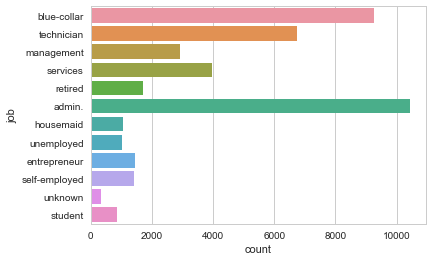

In [230]:
### Customer job description
sns.countplot(y='job',data=data)
plt.show()

# The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a 
# good predictor of the outcome variable.

In [202]:
### Wip 

# Check how to sort the values such that the bar starts decreasing one by one

##### Frequency of Marital status

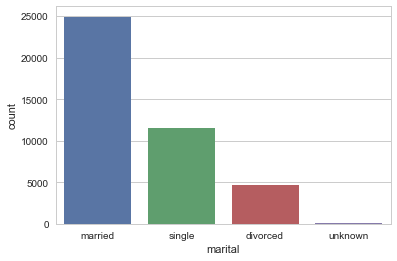

In [203]:
### Customer marital status description

sns.countplot(x='marital',data=data)
plt.show()

##### Frequency of Credit in default

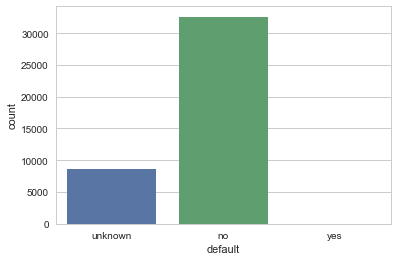

In [75]:
### credit in default

sns.countplot(x='default',data=data)
plt.show()

##### Frequency of Housing

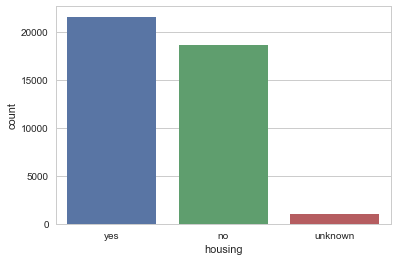

In [76]:
### Housing loan

sns.countplot(x='housing',data=data)
plt.show()

##### Frequency of Personal loan

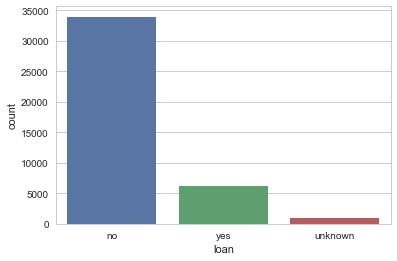

In [77]:
### Personal loan

sns.countplot(x='loan',data=data)
plt.show()

##### Frequency of Poutcome

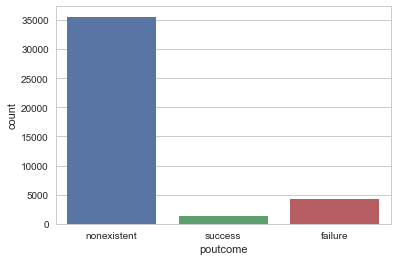

In [78]:
### previous marketing campaign outcome

sns.countplot(x='poutcome',data=data)
plt.show()

In [34]:
### Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, 
### whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous 
### marketing campaigns. So, we will drop the variables that we do not need.


# data.drop(data.columns[[0,3,7,8,9,10,11,12,13,15,16,17,18,19]],axis = 1, inplace=True)

In [104]:
data2 = data[['education','month','poutcome','job','default','loan','contact','age','duration','campaign','pdays','previous',
            'cons_price_idx','cons_conf_idx','nr_employed','y']]

In [105]:
data2.shape

(41188, 16)

In [106]:
data2.head()

,education,month,poutcome,job,default,loan,contact,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,y
0,Basic,aug,nonexistent,blue-collar,unknown,no,cellular,44,210,1,999,0,93.444,-36.1,5228.1,0
1,unknown,nov,nonexistent,technician,no,no,cellular,53,138,1,999,0,93.200,-42.0,5195.8,0
2,university.degree,jun,success,management,no,no,cellular,28,339,3,6,2,94.055,-39.8,4991.6,1
3,high.school,apr,nonexistent,services,no,no,cellular,39,185,2,999,0,93.075,-47.1,5099.1,0
4,Basic,aug,success,retired,no,no,cellular,55,137,1,3,1,92.201,-31.4,5076.2,1


In [205]:
categorical = data2.dtypes[data2.dtypes == "object"].index
print(categorical)

data[categorical].describe()

Index(['education', 'month', 'poutcome', 'job', 'default', 'loan', 'contact'], dtype='object')


,education,month,poutcome,job,default,loan,contact
count,41188,41188,41188,41188,41188,41188,41188
unique,6,10,3,12,3,3,2
top,Basic,may,nonexistent,admin.,no,no,cellular
freq,12513,13769,35563,10422,32588,33950,26144


In [206]:
Numerical = data2.dtypes[data2.dtypes != "object"].index
print(Numerical)

data2[Numerical].describe()

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons_price_idx',
       'cons_conf_idx', 'nr_employed', 'y'],
      dtype='object')


,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,93.575664,-40.502600,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,0.578840,4.628198,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,93.075000,-42.700000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,93.749000,-41.800000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,93.994000,-36.400000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,94.767000,-26.900000,5228.100000,1.000000


### DATA PREPROCESSING

Create dummy variables, that is variables with only two values, zero and one.
In logistic regression models, encoding all of the independent variables as dummy variables allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

In [208]:
for column_name in categorical:
    print(column_name,"-",len(data[column_name].unique()),"-",data2[
        
        
        column_name].unique(),"\n")

education - 6 - ['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate'] 

month - 10 - ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec'] 

poutcome - 3 - ['nonexistent' 'success' 'failure'] 

job - 12 - ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student'] 

default - 3 - ['unknown' 'no' 'yes'] 

loan - 3 - ['no' 'yes' 'unknown'] 

contact - 2 - ['cellular' 'telephone'] 



##### Creating dummy variables separately for variables with unknown columns

In [211]:
education_n = pd.get_dummies(data2['education'],drop_first = False)
education_n.head()

,Basic,high.school,illiterate,professional.course,university.degree,unknown
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [212]:
job_n = pd.get_dummies(data2['job'],drop_first = False)
job_n.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [213]:
default_n = pd.get_dummies(data2['default'],drop_first = False)
default_n.head()

,no,unknown,yes
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [214]:
loan_n = pd.get_dummies(data2['loan'],drop_first = False)
loan_n.head()

,no,unknown,yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [216]:
data2_dummies = pd.concat([education_n,job_n,default_n,loan_n],axis=1)
data2_dummies.head()

,Basic,high.school,illiterate,professional.course,university.degree,unknown,admin.,blue-collar,entrepreneur,housemaid,...,student,technician,unemployed,unknown,no,unknown,yes,no,unknown,yes
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [218]:
data2_dummies.columns

Index(['Basic', 'high.school', 'illiterate', 'professional.course',
       'university.degree', 'unknown', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'unknown', 'no', 'unknown',
       'yes', 'no', 'unknown', 'yes'],
      dtype='object')

In [224]:
### drop the unknown columns

data2_dummies.drop(columns=['unknown'], inplace=True)
data2_dummies.columns

Index(['Basic', 'high.school', 'illiterate', 'professional.course',
       'university.degree', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'no', 'yes', 'no', 'yes'],
      dtype='object')

In [227]:
data2_dummies_2 = pd.get_dummies(data2,columns=['month','poutcome','contact'],drop_first=True)
data2_dummies_2.head()

,education,job,default,loan,age,duration,campaign,pdays,previous,cons_price_idx,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,contact_telephone
0,Basic,blue-collar,unknown,no,44,210,1,999,0,93.444,...,0,0,0,0,0,0,0,1,0,0
1,unknown,technician,no,no,53,138,1,999,0,93.200,...,0,0,0,0,1,0,0,1,0,0
2,university.degree,management,no,no,28,339,3,6,2,94.055,...,0,1,0,0,0,0,0,0,1,0
3,high.school,services,no,no,39,185,2,999,0,93.075,...,0,0,0,0,0,0,0,1,0,0
4,Basic,retired,no,no,55,137,1,3,1,92.201,...,0,0,0,0,0,0,0,0,1,0


In [228]:
data2_dummies_2.columns

Index(['education', 'job', 'default', 'loan', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'cons_price_idx', 'cons_conf_idx', 'nr_employed',
       'y', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'contact_telephone'],
      dtype='object')

In [229]:
data2_dummies_2.drop(columns=['education', 'job', 'default', 'loan'],inplace=True)

In [233]:
data3 = pd.concat([data2_dummies,data2_dummies_2],axis=1)

In [176]:
# data3 = pd.get_dummies(data2,columns=['education', 'month', 'poutcome', 'job', 'default', 'loan', 'contact'],drop_first=True)

In [234]:
print("The number of observations and variables are of the raw dataset - ",data2.shape)

print("The number of observations and variables are after dummy variables created- ",data3.shape)

The number of observations and variables are of the raw dataset -  (41188, 16)
The number of observations and variables are after dummy variables created-  (41188, 41)


In [235]:
data3.head()

,Basic,high.school,illiterate,professional.course,university.degree,admin.,blue-collar,entrepreneur,housemaid,management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,contact_telephone
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [236]:
# ['job','marital','default','housing','loan','poutcome']

print("Unique values of Job are ",data.job.unique())
print('\n')
# print("Unique values of Marital are ",data.marital.unique())
# print('\n')
print("Unique values of Default are ",data.default.unique())
print('\n')
# print("Unique values of Housing are ",data.housing.unique())
# print('\n')
print("Unique values of Loan are ",data.loan.unique())
print('\n')
print("Unique values of poutcome are ",data.poutcome.unique())
print('\n')
print("Unique values of contact are ",data.contact.unique())
print('\n')
print("Unique values of month are ",data.month.unique())
print('\n')
# print("Unique values of day_of_week are ",data.day_of_week.unique())
# print('\n')
print("Unique values of education are ",data.education.unique())

# (data,columns=['job','marital','default','housing','loan','poutcome','contact','month','day_of_week','education'])

Unique values of Job are  ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']


Unique values of Default are  ['unknown' 'no' 'yes']


Unique values of Loan are  ['no' 'yes' 'unknown']


Unique values of poutcome are  ['nonexistent' 'success' 'failure']


Unique values of contact are  ['cellular' 'telephone']


Unique values of month are  ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']


Unique values of education are  ['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


In [237]:
data3.iloc[0:5,0:10]

,Basic,high.school,illiterate,professional.course,university.degree,admin.,blue-collar,entrepreneur,housemaid,management
0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [238]:
data3.iloc[0:5,10:16]

,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [239]:
data3.iloc[0:5,16:25]

,no,yes,no,yes,age,duration,campaign,pdays,previous
0,0,0,1,0,44,210,1,999,0
1,1,0,1,0,53,138,1,999,0
2,1,0,1,0,28,339,3,6,2
3,1,0,1,0,39,185,2,999,0
4,1,0,1,0,55,137,1,3,1


In [240]:
data3.iloc[0:5,25:33]

,cons_price_idx,cons_conf_idx,nr_employed,y,month_aug,month_dec,month_jul,month_jun
0,93.444,-36.1,5228.1,0,1,0,0,0
1,93.200,-42.0,5195.8,0,0,0,0,0
2,94.055,-39.8,4991.6,1,0,0,0,1
3,93.075,-47.1,5099.1,0,0,0,0,0
4,92.201,-31.4,5076.2,1,1,0,0,0


In [241]:
data3.iloc[0:5,33:]

,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,contact_telephone
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0


In [ ]:
### WIP

Create a function to remove one variable by itself or by users choice
Create a function to see how many variables newly created as compared
And also see how each dummy values are created for each categorical variable
create a function to remove the all the columns if they have 'unknown' word in it

In [242]:
data3.columns

Index(['Basic', 'high.school', 'illiterate', 'professional.course',
       'university.degree', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'no', 'yes', 'no', 'yes', 'age',
       'duration', 'campaign', 'pdays', 'previous', 'cons_price_idx',
       'cons_conf_idx', 'nr_employed', 'y', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success',
       'contact_telephone'],
      dtype='object')

In [243]:
### drop the unknown columns

# data3.drop(data3.columns[[13,35,36,38]], axis=1, inplace=True)
# data3.columns

In [244]:
print("The number of observations and variables after unknown variable are removed - ",data3.shape)

The number of observations and variables after unknown variable are removed -  (41188, 41)


In [ ]:
### WIP

# check how to remove the columns with the word 'unknown'

In [245]:
data_final_vars=data3.columns.values.tolist();
data_final_vars

y=['y']
X=[i for i in data_final_vars if i not in y]

In [246]:
print(X)

['Basic', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'no', 'yes', 'no', 'yes', 'age', 'duration', 'campaign', 'pdays', 'previous', 'cons_price_idx', 'cons_conf_idx', 'nr_employed', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success', 'contact_telephone']


In [247]:
print(y)

['y']


### FEATURE SELECTION

##### Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [248]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg,18)
rfe = rfe.fit(data3[X],data3[y])

# print(rfe.support_)
# print(rfe.ranking_)
print('Selected features: %s' %list(data3[X].columns[rfe.support_]))


# The RFE has helped us select the following features: “previous”, “euribor3m”, “job_blue-collar”, “job_retired”,
#     “job_services”, “job_student”, “default_no”, “month_aug”, “month_dec”, “month_jul”, “month_nov”, “month_oct”, 
#     “month_sep”, “day_of_week_fri”, “day_of_week_wed”, “poutcome_failure”, “poutcome_nonexistent”, “poutcome_success”.

C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected features: ['Basic', 'high.school', 'admin.', 'retired', 'student', 'no', 'no', 'previous', 'month_aug', 'month_dec', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'poutcome_nonexistent', 'poutcome_success', 'contact_telephone']


In [249]:
cols=['Basic', 'high.school', 'admin.', 'retired', 'student', 'no', 'no', 'previous', 
      'month_aug', 'month_dec', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 
      'poutcome_nonexistent', 'poutcome_success', 'contact_telephone']
X=data3[cols]
y=data3['y']

# y.ravel

In [ ]:
### WIP 

Check out how we got those columns using RFE

##### Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation

Optimal number of features: 2
Selected features: ['month_mar', 'poutcome_success']


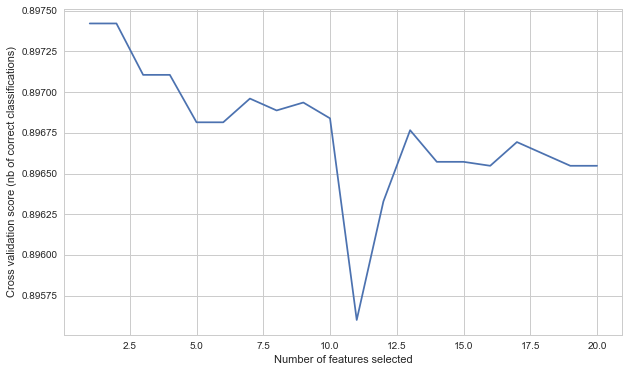

In [265]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### SPLIT THE DATA

In [250]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state=2)

In [251]:
### check out if the training data is sufficient

print("The number of observation and variables in X_train dataset are- ",X_train.shape)
print("The number of observation and variables in X_test dataset are- ",X_test.shape)
print("The number of observation and variables in y_train dataset are- ",y_train.shape)
print("The number of observation and variables in y_test dataset are- ",y_train.shape)

The number of observation and variables in X_train dataset are-  (32950, 20)
The number of observation and variables in X_test dataset are-  (8238, 20)
The number of observation and variables in y_train dataset are-  (32950,)
The number of observation and variables in y_test dataset are-  (32950,)


In [ ]:
### WIP
check out the concept of random_state

### MODEL FITTING

In [261]:
### Fit logistic regression to the training set

classifier = LogisticRegression(random_state=0);
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
### WIP

check out the parameter of classifier

###  MODEL VALIDATION

##### ACCURACY

In [260]:
print ('Accuracy of logistic regrssion classifier on test set: {:.2f}'.format(classifier.score(X_test,y_test)))

Accuracy of logistic regrssion classifier on test set: 0.89


In [ ]:
### WIP

Check hwat does :.2f means and what are the other formats available

##### CONFUSION MATRIX

In [254]:
y_pred = classifier.predict(X_test);
# y_pred
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

# The result is telling us that we have 9046+229 correct predictions and 912+110 incorrect predictions.

[[7182   69]
 [ 831  156]]


##### CROSS VALIDATION

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [255]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10,random_state=7)
modelCV= LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,X_train,y_train,cv=kfold,scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" %results.mean())

# The average accuracy remains very close to the Logistic Regression model accuracy; 
# hence, we can conclude that our model generalizes well.

10-fold cross validation average accuracy: 0.898


In [256]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.897
LogisticRegression average log_loss is 0.296
LogisticRegression average auc is 0.756


##### Compute precision, recall, F-measure and support

To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [257]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


# Interpretation: 
# 1. Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. 
# 2 .Of the entire test set, 90% of the customer’s preferred term deposits that were promoted

             precision    recall  f1-score   support

          0       0.90      0.99      0.94      7251
          1       0.69      0.16      0.26       987

avg / total       0.87      0.89      0.86      8238



##### ROC CURVE

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

Train/Test split results:
LogisticRegression accuracy is 0.891
LogisticRegression log_loss is 0.310
LogisticRegression auc is 0.747


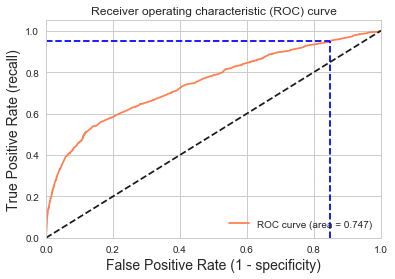

Using a threshold of 0.035 guarantees a sensitivity of 0.951 and a specificity of 0.151, i.e. a false positive rate of 84.88%.


In [258]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logreg = LogisticRegression(random_state=0);
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


### Check later

### IMPLEMENTING THE MODEL

In [131]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())


# The p-values for most of the variables are smaller than 0.05, therefore, most of them are significant to the model.

C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


         Current function value: 0.295593
         Iterations: 35


C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\athiq.ahmed\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountere

                           Results: Logit
Model:                Logit             No. Iterations:    35.0000   
Dependent Variable:   y                 Pseudo R-squared:  0.160     
Date:                 2018-06-26 21:12  AIC:               24383.7833
No. Observations:     41188             BIC:               24530.4236
Df Model:             16                Log-Likelihood:    -12175.   
Df Residuals:         41171             LL-Null:           -14499.   
Converged:            0.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous              0.3424   0.0537   6.3774 0.0000  0.2372  0.4476
month_apr            -0.6167   0.1101  -5.6020 0.0000 -0.8325 -0.4009
month_aug            -1.4077   0.1076 -13.0836 0.0000 -1.6186 -1.1969
month_dec             0.2730   0.1932   1.4132 0

In [ ]:
### WIP

Check what are the other values we will get for results ?

In [106]:
# X = data2.iloc[:,1:]
# y = data2.iloc[:,10]

# X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [ ]:
### WIP

check out the concept of random_state
Check out if the divide in the format of 60:40 or 70:30

### Classifier visualization playground

The purpose of this section is to visualize logistic regression classsifiers’ decision boundaries. In order to better vizualize the decision boundaries, we’ll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions.

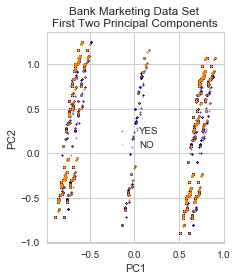

In [150]:
from sklearn.decomposition import PCA

X = data2.iloc[:,1:]
y = data2.iloc[:,0]

pca = PCA(n_components=2).fit_transform(X);pca
X_train,X_test,y_train,y_test = train_test_split(pca,y,random_state = 0)

plt.figure(dpi=70)
plt.scatter(pca[y.values==0,0],pca[y.values==0,1],alpha=0.5,label ='YES', s=2, color ='navy')
plt.scatter(pca[y.values==1,0],pca[y.values==1,1],alpha=0.5,label ='NO', s=2, color ='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set \nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

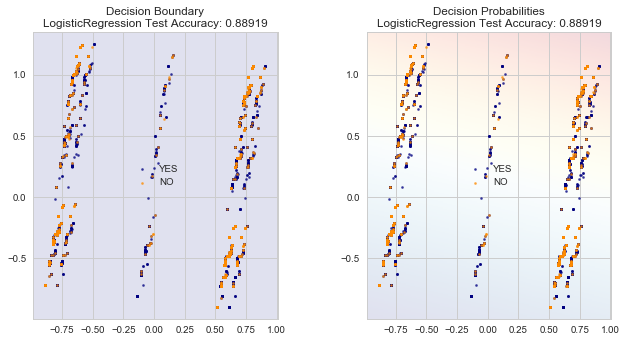

In [154]:
def plot_bank(X, y, fitted_model):
    plt.figure(figsize=(9.8,5), dpi=70)
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        plt.tight_layout()
        plt.legend()
        plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
model = LogisticRegression()
model.fit(X_train,y_train)
plot_bank(X_test, y_test, model)
plt.show()

In [ ]:
### WIP

learn more about pca and its parameters
check out the blocks of each of the above 2 diagrams

##### Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

In [ ]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications

logreg = LogisticRegression()
rfecv = RFECV(estimator = logreg, step=1,cv=10,scoring='accuracy')
rfecv.fit(data3[X],data3[y])

print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % list(data3[X].columns[rfecv.support_]))


# Plot number of features vs cross validation scores
# plt.figure(figsize=(10,6))
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classification)")
# plt.plot(1,len(rfecv.grid_scores_)+1, rfecv.grid_scores_)
# plt.show()

In [ ]:
### WIP

Feature ranking with recursive feature elimination and cross-validation is not properly working as it is giving all the columns
instead of few columns, chk out

In [7]:
# import scikit-learn

# !pip install -U scikit-learn